In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy as stats
from scipy.stats import norm , skew
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold ,cross_val_score
from sklearn.model_selection import cross_val_predict

In [2]:
file_name = 'rest_Data_Train.xlsx' 
train = pd.read_excel(file_name)
train["source"] = "train"

In [3]:
file_name1 = 'rest_Data_Test.xlsx' 
test= pd.read_excel(file_name1)
test["source"] = "test"

In [4]:
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,train
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,train


In [5]:
test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,source
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes,test
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes,test
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes,test
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes,test
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes,test


In [6]:
train.shape

(12690, 10)

In [7]:
train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
source              0
dtype: int64

In [8]:
train.duplicated().sum()

25

In [9]:
train= train.drop_duplicates()

In [10]:
test.duplicated().sum()

1

In [11]:
test= test.drop_duplicates()

In [12]:
test.shape

(4230, 9)

In [13]:
test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
source             0
dtype: int64

In [14]:
all_data = pd.concat([train, test], ignore_index=True, sort =False)

In [15]:
all_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,train
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,train


In [16]:
all_data.shape

(16895, 10)

In [17]:
all_data.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1602
COST             4230
source              0
dtype: int64

In [18]:
all_data.duplicated().sum()

0

In [19]:
all_data.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING            object
VOTES             object
COST             float64
source            object
dtype: object

# Data Exploration

#### check and remove skewness from dataset by using feature transformation

### 1. univariate analysis

Text(0.5, 0, 'Log-Unit-Price')

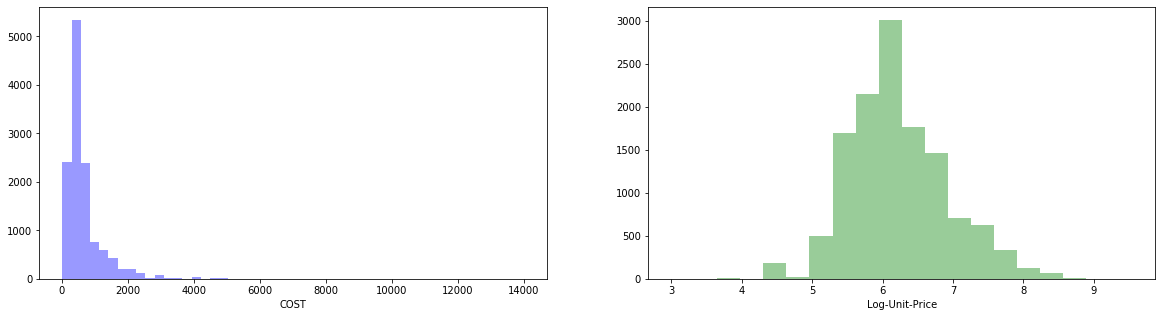

In [20]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(train.COST, ax=ax[0], kde=False, color="blue")
sns.distplot(np.log(train.COST), ax=ax[1], bins=20, color="green", kde=False)
ax[1].set_xlabel("Log-Unit-Price")

here,we can see that actual cost of resturent is right skeweed after apply log transformation in 'cost' feature it looks like normal distribution.

In [21]:
train["RATING"].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

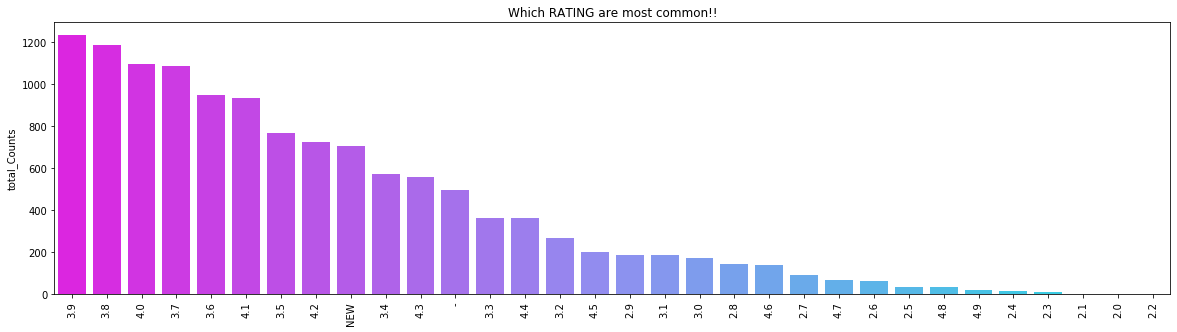

In [22]:
total_RATING_count = train.RATING.value_counts().sort_values(ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(total_RATING_count .index, total_RATING_count .values, palette="cool_r")
plt.ylabel("total_Counts")
plt.title("Which RATING are most common!!")
plt.xticks(rotation=90)

# Bivariate analysis

Top Restaurants by Rating

In [23]:
all_data['RATING'] = all_data['RATING'].astype(str)
# Dealing with instanced with 'NEW' & '-'
all_data['RATING'] = all_data['RATING'].apply(lambda x: x.replace('NEW', str(np.nan)))
all_data['RATING'] = all_data['RATING'].apply(lambda x: x.replace('-', str(np.nan)))

# Changing data type
all_data['RATING'] = all_data['RATING'].astype(float)
print(f'{type(all_data["RATING"][0])}')

<class 'numpy.float64'>


In [24]:
train['rate_transform'] = train['RATING'].astype(str)
# Dealing with instanced with 'NEW' & '-'
train['rate_transform'] = train['rate_transform'].apply(lambda x: x.replace('NEW', str(np.nan)))
train['rate_transform'] = train['rate_transform'].apply(lambda x: x.replace('-', str(np.nan)))

# Changing data type
train['rate_transform'] = train['rate_transform'].astype(float)
print(f'{type(train["rate_transform"][0])}')

<class 'numpy.float64'>


In [25]:
train_not_null = train.dropna(subset=['rate_transform'])
train_filled = train_not_null.fillna('Not defined')
train_filled.isnull().sum()

TITLE             0
RESTAURANT_ID     0
CUISINES          0
TIME              0
CITY              0
LOCALITY          0
RATING            0
VOTES             0
COST              0
source            0
rate_transform    0
dtype: int64

In [26]:
grouped_rate = train_filled.groupby(by='TITLE', as_index=False).mean()
top_rating = grouped_rate.sort_values(by='rate_transform', ascending=False).iloc[:15, np.r_[0, -1]]
top_rating

,TITLE,rate_transform
33,"CASUAL DINING,CLUB",4.600000
84,"MICROBREWERY,PUB",4.525000
89,"PUB,CAFÉ",4.500000
82,"MICROBREWERY,CASUAL DINING",4.425000
80,MICROBREWERY,4.425000
81,"MICROBREWERY,BAR",4.425000
14,"BAR,MICROBREWERY",4.400000
27,"CAFÉ,LOUNGE",4.400000
92,"PUB,MICROBREWERY",4.335714
36,"CASUAL DINING,IRANI CAFE",4.333333


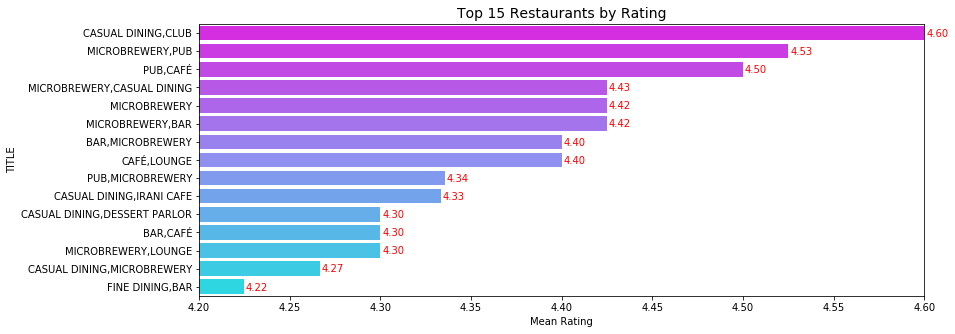

In [27]:
# Plotting
fig, ax = plt.subplots(figsize=(13, 5))
ax = sns.barplot(y='TITLE', x='rate_transform', data=top_rating, palette='cool_r')
ax.set_xlim([4.2, 4.6])
ax.set_xlabel('Mean Rating')
ax.set_ylabel('TITLE')

for p in ax.patches:
    width = p.get_width()
    ax.text(width+0.007, p.get_y() + p.get_height() / 2. + 0.2, '{:1.2f}'.format(width), 
            ha="center", color='red')

ax.set_title('Top 15 Restaurants by Rating', size=14)
plt.show()

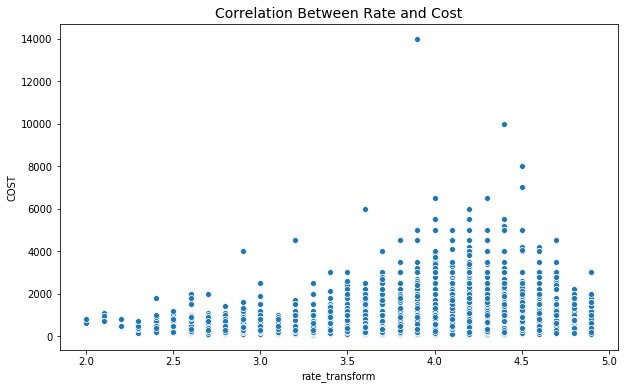

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='rate_transform', y='COST', data=train_filled, ax=ax)
#format_spines(ax, right_border=False)
ax.set_title('Correlation Between Rate and Cost', size=14)
plt.show()

In [29]:
#combining City and locality
all_data['Location']=all_data['CITY']+' '+all_data['LOCALITY']

In [30]:
all_data.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING           1602
VOTES            1602
COST             4230
source              0
Location          148
dtype: int64

# missing value treatment

In [31]:
all_data.VOTES.fillna('0',inplace=True)
all_data['VOTES']=all_data['VOTES'].str.extract('(\d+)').astype(float)

In [32]:
all_data["RATING"] = all_data.RATING.transform(lambda x : x.fillna(x.mode()[0]))

In [33]:
all_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source,Location
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,train,Thane Dombivali East
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,train,Chennai Ramapuram
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0,train,Chennai Saligramam
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0,train,Mumbai Bandra West
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0,train,Mumbai Lower Parel


In [34]:
import fuzzywuzzy

In [35]:
all_data.dropna(subset=['Location'],inplace=True)

In [36]:
all_data.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              0
VOTES               0
COST             4195
source              0
Location            0
dtype: int64

In [37]:
from fuzzywuzzy import process
 
names=[]
def match_names(wrong_names,correct_names):
    for row in wrong_names:
        x=process.extractOne(row, correct_names)
        if x[1]<60:
            names.append('Others')
        else:
            names.append(x[0])
    return names
  
#Wrong country names dataset

correct_names=['Bangalore','Thane',
'Hyderabad','Andheri',
'Delhi', 'Kerala',
'Chennai', 'Bandra',
'Mumbai', 'Telangana',
'Kochi', 
'Noida', 
'Gurgaon', 'Ernakulam',
'Faridabad', 'Ghaziabad',
'Secunderabad' ]
match=match_names(all_data.Location,correct_names)    

print(len(names))
all_data['Location']=names

C:\ProgramData\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


16747


In [38]:
db_City=pd.get_dummies(all_data['Location'])
all_data.drop(columns='Location',inplace=True)
db_City.head()

,Andheri,Bandra,Bangalore,Chennai,Delhi,Ernakulam,Faridabad,Ghaziabad,Gurgaon,Hyderabad,Kerala,Kochi,Mumbai,Noida,Others,Secunderabad,Telangana,Thane
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [39]:
title=[]
for row in all_data['TITLE']:
    title.append(list(row.split(',')))
all_data['TITLE']=title

In [40]:
df_title=all_data['TITLE'].apply(lambda x: pd.Series(1, x))

In [41]:
df_title.head()

,CASUAL DINING,BAR,QUICK BITES,DESSERT PARLOR,CAFÉ,MICROBREWERY,BEVERAGE SHOP,IRANI CAFE,BAKERY,None,...,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP,BHOJANALYA
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
cuisines=[]
for row in all_data['CUISINES']:
    cuisines.append(list(row.split(',')))

all_data['CUISINES']=cuisines

In [43]:
all_data['CUISINES'].isna().sum()

0

In [44]:
df_cuisines=all_data['CUISINES'].apply(lambda x: pd.Series(1, x))

In [45]:
df_cuisines.head()

,Malwani,Goan,North Indian,Asian,Modern Indian,Japanese,North Indian,Chinese,Biryani,Hyderabadi,...,Egyptian,African,Egyptian,Fish and Chips,Brazilian,South American,Mishti,Falafel,Cantonese,Hawaiian
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# concat all type of dataset

In [46]:
df_cuisines.dtypes

Malwani               float64
 Goan                 float64
 North Indian         float64
Asian                 float64
 Modern Indian        float64
 Japanese             float64
North Indian          float64
 Chinese              float64
 Biryani              float64
 Hyderabadi           float64
Tibetan               float64
Desserts              float64
 Seafood              float64
Cafe                  float64
 Pizza                float64
 Burger               float64
Bar Food              float64
South Indian          float64
 Fast Food            float64
Fast Food             float64
 Beverages            float64
Arabian               float64
 Mughlai              float64
Maharashtrian         float64
Parsi                 float64
Chinese               float64
 Thai                 float64
Bakery                float64
 Momos                float64
Continental           float64
                       ...   
 Russian              float64
South American        float64
Iranian   

In [47]:
df_title.dtypes

CASUAL DINING     float64
BAR               float64
QUICK BITES       float64
DESSERT PARLOR    float64
CAFÉ              float64
MICROBREWERY      float64
BEVERAGE SHOP     float64
IRANI CAFE        float64
BAKERY            float64
None              float64
PUB               float64
FINE DINING       float64
SWEET SHOP        float64
LOUNGE            float64
FOOD COURT        float64
FOOD TRUCK        float64
MESS              float64
KIOSK             float64
CLUB              float64
CONFECTIONERY     float64
DHABA             float64
MEAT SHOP         float64
COCKTAIL BAR      float64
PAAN SHOP         float64
BHOJANALYA        float64
dtype: object

In [48]:
db_City.dtypes

Andheri         uint8
Bandra          uint8
Bangalore       uint8
Chennai         uint8
Delhi           uint8
Ernakulam       uint8
Faridabad       uint8
Ghaziabad       uint8
Gurgaon         uint8
Hyderabad       uint8
Kerala          uint8
Kochi           uint8
Mumbai          uint8
Noida           uint8
Others          uint8
Secunderabad    uint8
Telangana       uint8
Thane           uint8
dtype: object

In [49]:
all_data.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES            float64
COST             float64
source            object
dtype: object

In [50]:
all_data = pd.concat([all_data,db_City,df_cuisines,df_title], axis=1)

In [51]:
all_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source,...,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP,BHOJANALYA
0,[CASUAL DINING],9438,"[Malwani, Goan, North Indian]","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,train,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[CASUAL DINING, BAR]",13198,"[Asian, Modern Indian, Japanese]",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,train,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[CASUAL DINING],10915,"[North Indian, Chinese, Biryani, Hyderabadi]","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0,train,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[QUICK BITES],6346,"[Tibetan, Chinese]",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0,train,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[DESSERT PARLOR],15387,[Desserts],11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0,train,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
all_data.shape

(16747, 282)

# checking only object datatype

In [53]:
data_column_category = all_data.select_dtypes(exclude=np.number).columns
data_column_category

Index(['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'source'], dtype='object')

In [54]:
all_data.drop(columns='TITLE',inplace=True)
all_data.drop(columns='CUISINES',inplace=True)
all_data.drop(columns='TIME',inplace=True)
all_data.drop(columns='CITY',inplace=True)
all_data.drop(columns='LOCALITY',inplace=True)

In [55]:
all_data.fillna(0,inplace=True)

#### drop duplicate column

In [56]:
all_data = all_data.loc[:,~all_data.columns.duplicated()]

# split train and test data

In [77]:
train_final = all_data[all_data.source=="train"]
test_final = all_data[all_data.source=="test"]

In [78]:
train_final.shape

(12552, 276)

In [79]:
train_final.drop(columns=["source"],inplace=True)

In [80]:
train_final.shape

(12552, 275)

In [81]:
test_final.drop(columns=["source",'COST'],inplace=True)

In [82]:
X = train_final.drop(columns=["COST",'RESTAURANT_ID'])
y = train_final["COST"]

In [83]:
test_X = test_final.drop(columns=["RESTAURANT_ID"])

In [84]:
X.isna().sum()

RATING             0
VOTES              0
Andheri            0
Bandra             0
Bangalore          0
Chennai            0
Delhi              0
Ernakulam          0
Faridabad          0
Ghaziabad          0
Gurgaon            0
Hyderabad          0
Kerala             0
Kochi              0
Mumbai             0
Noida              0
Others             0
Secunderabad       0
Telangana          0
Thane              0
Malwani            0
 Goan              0
 North Indian      0
Asian              0
 Modern Indian     0
 Japanese          0
North Indian       0
 Chinese           0
 Biryani           0
 Hyderabadi        0
                  ..
 South American    0
 Mishti            0
 Falafel           0
Cantonese          0
 Hawaiian          0
CASUAL DINING      0
BAR                0
QUICK BITES        0
DESSERT PARLOR     0
CAFÉ               0
MICROBREWERY       0
BEVERAGE SHOP      0
IRANI CAFE         0
BAKERY             0
None               0
PUB                0
FINE DINING  

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Modelling

# 1. Linear Regression

In [86]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
train_predictions = model.predict(X)

In [87]:
from sklearn.model_selection import cross_val_score
cv= cross_val_score(model,X, y, cv=5, scoring='neg_mean_squared_error')

In [88]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error, r2_score
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y.values, train_predictions)))
    
#Predict on testing data:
test_X.fillna(0,inplace=True)
test_final["pred_price"] =  model.predict(test_X)

RMSE : 331.4


In [89]:
print('r2 train',r2_score(y,train_predictions))

r2 train 0.7223107452957809


In [90]:
Linear_report = test_final[["RESTAURANT_ID","pred_price"]]

In [91]:
Linear_report.head(10)

,RESTAURANT_ID,pred_price
12665,4085,928.985352
12666,12680,363.857090
12667,1411,817.151062
12668,204,354.651450
12669,13453,166.301229
12670,4518,51.772420
12671,1643,712.692214
12672,5109,628.854302
12673,5606,396.953342
12674,14319,583.658878


### find best parametrers using gridsearhCV and also check and remove overfitting and underfitting problem by using hyperparameter tuning

In [92]:
def Snippet(model, X_test, y_test,X_train,y_train,parameters): 
    
    print(format('How to find parameters using GridSearchCV  for Regression','*^82'))    
    
    import warnings
    warnings.filterwarnings("ignore")
    
    # load libraries
    from sklearn.model_selection import GridSearchCV
    #print(model,parameters)
    
    grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2,refit=True, n_jobs=-1)
    grid.fit(X_train, y_train)   
    
    y_pred = grid.best_estimator_.predict(X_test)
    train_y_pred = grid.best_estimator_.predict(X_train)
    test_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    train_RMSE = np.sqrt(mean_squared_error(y_train, train_y_pred))
    test_r2 = r2_score(y_test,y_pred)
    train_r2 = r2_score(y_train,train_y_pred)
    
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_pred)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    
    
    # Results from Grid Search
    print("\n========================================================")
    print(" Results from Grid Search " )
    print("========================================================")    
    
    print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
    print("\n The best score across ALL searched params:\n",
          grid.best_score_)
    
    print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
                                    
    print("\n The train_RMSE across ALL models:\n",
          train_RMSE)
                                    
    print("\n The test_RMSE across ALL models:\n",
          test_RMSE) 
    
    print("\n The train_r2_score across ALL models:\n",
          train_r2)
                                    
    print("\n The test_r2_score across ALL models:\n",
          test_r2)
    
    print (plt.show())
    
    print("\n ========================================================")

************How to find parameters using GridSearchCV  for Regression*************
[12:37:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.2, verbosity=1)

 The best score across ALL searched params:
 0.7137342866373897

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500, 'subsample': 

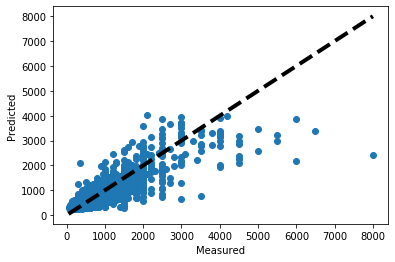

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.03, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.6822553930655064

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 6, 'n_estimat

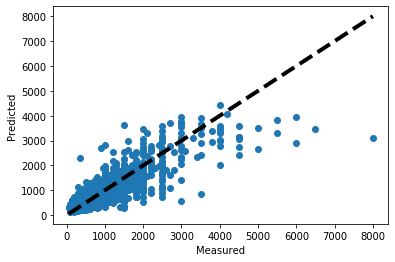

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=45, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.6897590119639974

 The best parameters across ALL searched params:
 {'max_depth': 8, 'min_samples_leaf': 3, 'n_estimators': 1000, 'random_state': 45}

 The train_RMSE across ALL models:
 292.1084276071313

 The test_RMSE across ALL models:
 341.76241002156394

 The train_r2_score across ALL 

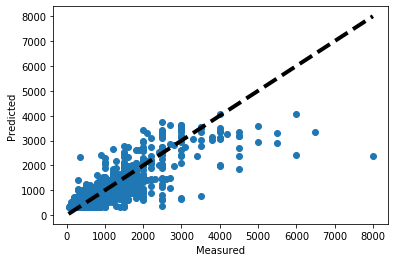

None



In [93]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
alg = [XGBRegressor(), GradientBoostingRegressor(),RandomForestRegressor()]
parameters = [{'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
                
              {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
              {'max_depth'    : [4,6,8],
              'n_estimators' : [100,500,1000],
              'min_samples_leaf':[1,2,3],
              'random_state': [40,45,50]}
             ]


for i in range(len(alg)):
    #print(alg[i])
                          
    Snippet(alg[i] ,X_test, y_test,X_train,y_train,parameters[i])

#### bar plot of features importances

[13:56:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


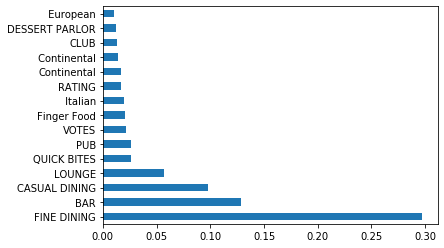

In [111]:
model = XGBRegressor()
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest(15)
feat_importances.plot(kind='barh')

## save model

In [112]:
import pickle

In [113]:
filename='rest_XGBRegressor_model.sav'

In [114]:
pickle.dump(model, open(filename, 'wb'))

In [115]:
load_lr_model =pickle.load(open(filename, 'rb'))

[13:56:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [116]:
cols_when_model_builds = model.get_booster().feature_names

In [117]:
cols_when_model_builds

['RATING',
 'VOTES',
 'Andheri',
 'Bandra',
 'Bangalore',
 'Chennai',
 'Delhi',
 'Ernakulam',
 'Faridabad',
 'Ghaziabad',
 'Gurgaon',
 'Hyderabad',
 'Kerala',
 'Kochi',
 'Mumbai',
 'Noida',
 'Others',
 'Secunderabad',
 'Telangana',
 'Thane',
 'Malwani',
 ' Goan',
 ' North Indian',
 'Asian',
 ' Modern Indian',
 ' Japanese',
 'North Indian',
 ' Chinese',
 ' Biryani',
 ' Hyderabadi',
 'Tibetan',
 'Desserts',
 ' Seafood',
 'Cafe',
 ' Pizza',
 ' Burger',
 'Bar Food',
 'South Indian',
 ' Fast Food',
 'Fast Food',
 ' Beverages',
 'Arabian',
 ' Mughlai',
 'Maharashtrian',
 'Parsi',
 'Chinese',
 ' Thai',
 'Bakery',
 ' Momos',
 'Continental',
 ' European',
 ' Rolls',
 'Andhra',
 ' Italian',
 'Biryani',
 ' BBQ',
 'Italian',
 'Finger Food',
 ' Continental',
 ' Asian',
 ' Tea',
 ' American',
 ' Healthy Food',
 'Beverages',
 ' Coffee',
 ' Indonesian',
 ' Korean',
 ' South Indian',
 'American',
 ' Nepalese',
 'European',
 'Ice Cream',
 ' Desserts',
 ' Mexican',
 'Seafood',
 ' Indian',
 'Pizza',
 'Mit

In [118]:
test_X = test_X[cols_when_model_builds]

In [119]:
test_X.head()

,RATING,VOTES,Andheri,Bandra,Bangalore,Chennai,Delhi,Ernakulam,Faridabad,Ghaziabad,...,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP,BHOJANALYA
12665,4.3,564.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12666,4.2,61.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12667,3.8,350.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12668,3.8,1445.0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12669,3.6,23.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## predict test data

In [120]:
y_load_predit=load_lr_model.predict(test_X)

In [121]:
y_load_predit

array([1012.7838 ,  258.19174,  653.9607 , ...,  536.62524,  307.4753 ,
        402.66293], dtype=float32)

In [122]:
test_X['Cost'] = y_load_predit

In [124]:
test_X.head()

,RATING,VOTES,Andheri,Bandra,Bangalore,Chennai,Delhi,Ernakulam,Faridabad,Ghaziabad,...,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP,BHOJANALYA,Cost
12665,4.3,564.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1012.783813
12666,4.2,61.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,258.191742
12667,3.8,350.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,653.960693
12668,3.8,1445.0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,533.520264
12669,3.6,23.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,240.170090


In [125]:
predi_Cost = pd.DataFrame(columns=['Cost'])

In [126]:
predi_Cost['Cost']= test_X['Cost']

In [127]:
predi_Cost.head()

,Cost
12665,1012.783813
12666,258.191742
12667,653.960693
12668,533.520264
12669,240.170090


#### create csv file of resturent's Cost prediction

In [128]:
predi_Cost.to_csv('predict_resturent_cost.csv',index=False)